In [1]:
%matplotlib inline
from pylab import plt

In [2]:
from sympy import integrate, init_printing, symbols, sin, cos, lambdify, Sum, Piecewise, oo, Ne
import numpy as np
from numpy import pi
from sympy import pi as s_pi

In [3]:
plt.rcParams["figure.figsize"] = (30, 30/np.sqrt(2))
plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = "serif"

In [4]:
init_printing(use_unicode=False)

In [5]:
t, n, N = symbols('t, n, N')
T = 0.01
dT = 0.003
Um = 4
w = 2*s_pi/T
x = np.linspace(0, T, 20000)

In [6]:
ft = Piecewise(
    (1000*t+2,
        (0 <= t) & (t < 2/3*dT)),
    (Um,
        (2/3*dT <= t) & (t < dT)),
    (0, dT <= t)
)

In [7]:
f_orig = lambdify(t, ft)

In [8]:
a0 = 2/T*integrate(ft, (t, 0, T))

In [9]:
an = 2/T*integrate(ft*cos(n*w*t), (t, 0, T))

In [10]:
bn = 2/T*integrate(ft*sin(n*w*t), (t, 0, T))

In [11]:
ftN = a0/2 + Sum(an*cos(n*w*t) + bn*sin(n*w*t), (n, 1, N))

In [12]:
ftN

  N                                                                            >
_____                                                                          >
\    `                                                                         >
 \     /      /sin(0.6*pi*n)   cos(0.4*pi*n)       1    \                      >
  \    |200.0*|------------- + ------------- - ---------|*cos(200*pi*n*t) + 20 >
   \   |      |   50*pi*n             2  2          2  2|                      >
    )  <      \                  40*pi *n      40*pi *n /                      >
   /   |                                                                       >
  /    |                                                         2.0*cos(200*p >
 /     \                                                                       >
/____,                                                                         >
n = 1                                                                          >

>                          

In [13]:
f = lambdify([t, N], ftN)

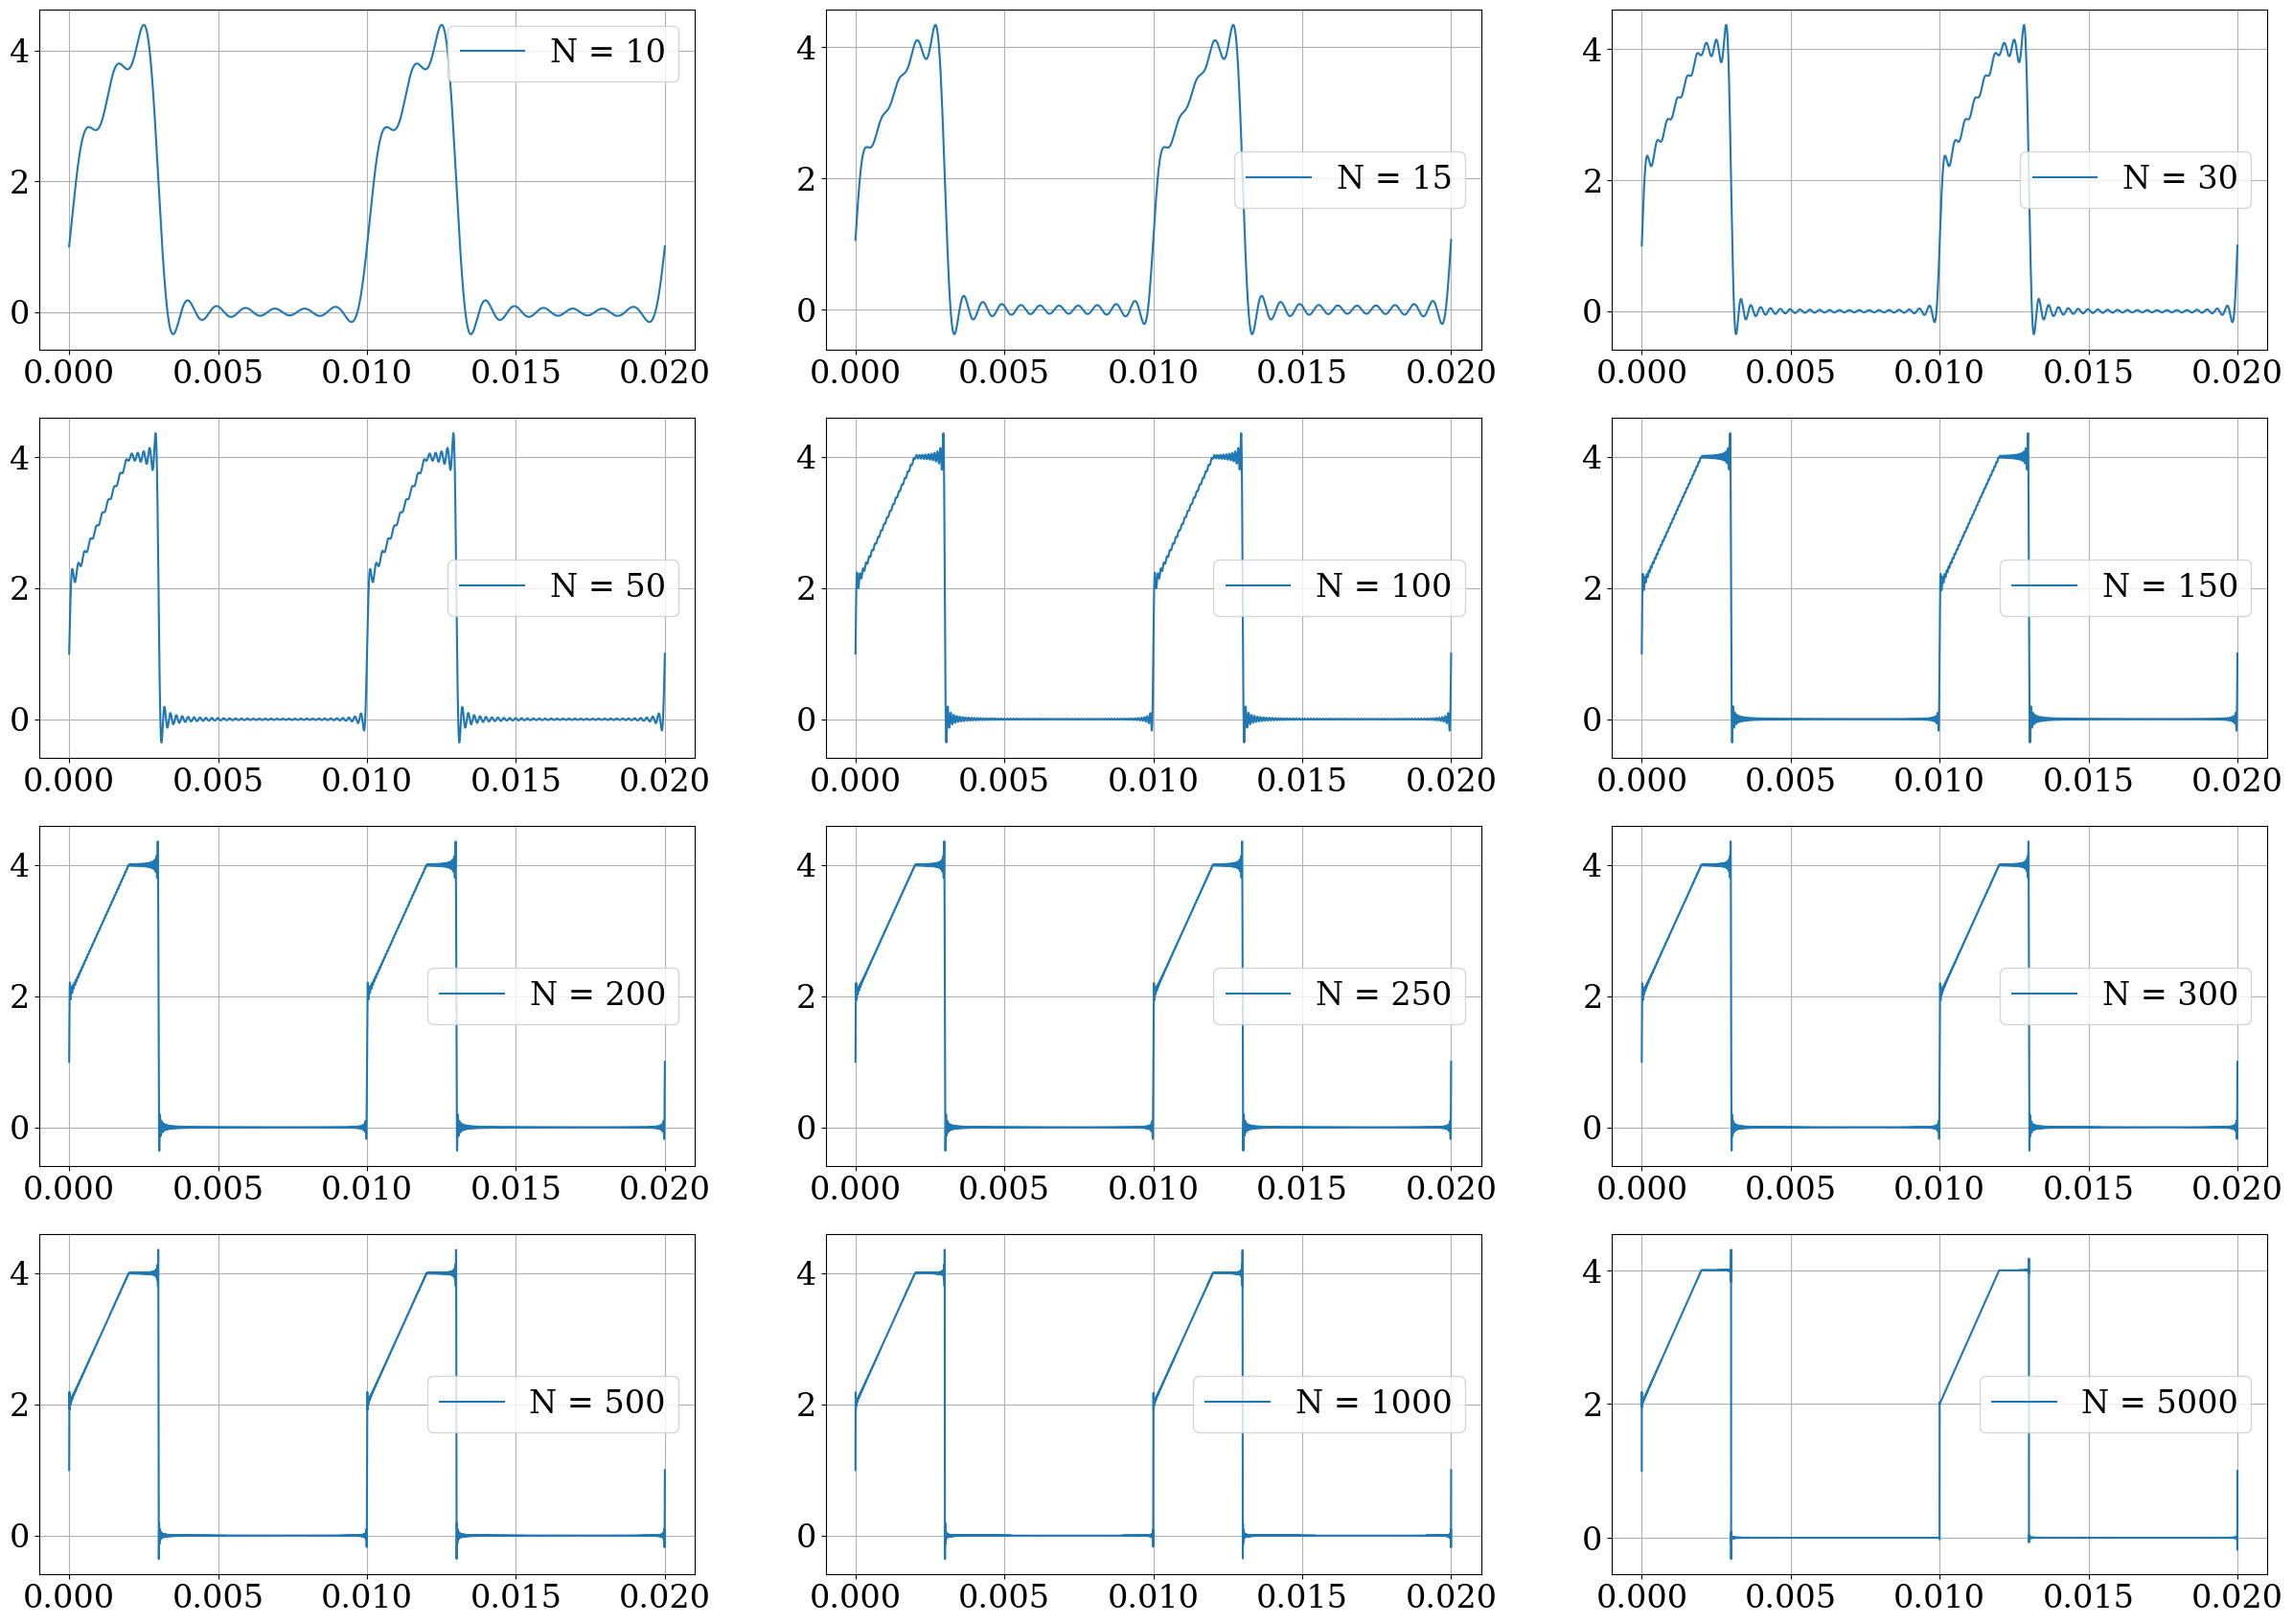

In [14]:
x = np.linspace(0, 2*T, 20000)
for i, M in enumerate([10, 15, 30] + list(range(50, 350, 50)) + [500, 1000, 5000], start=1):
    plt.subplot(4, 3, i)
    plt.plot(x, f(x, M))
    plt.legend([f'N = {M}'])
    plt.grid()
plt.savefig("saar.png")

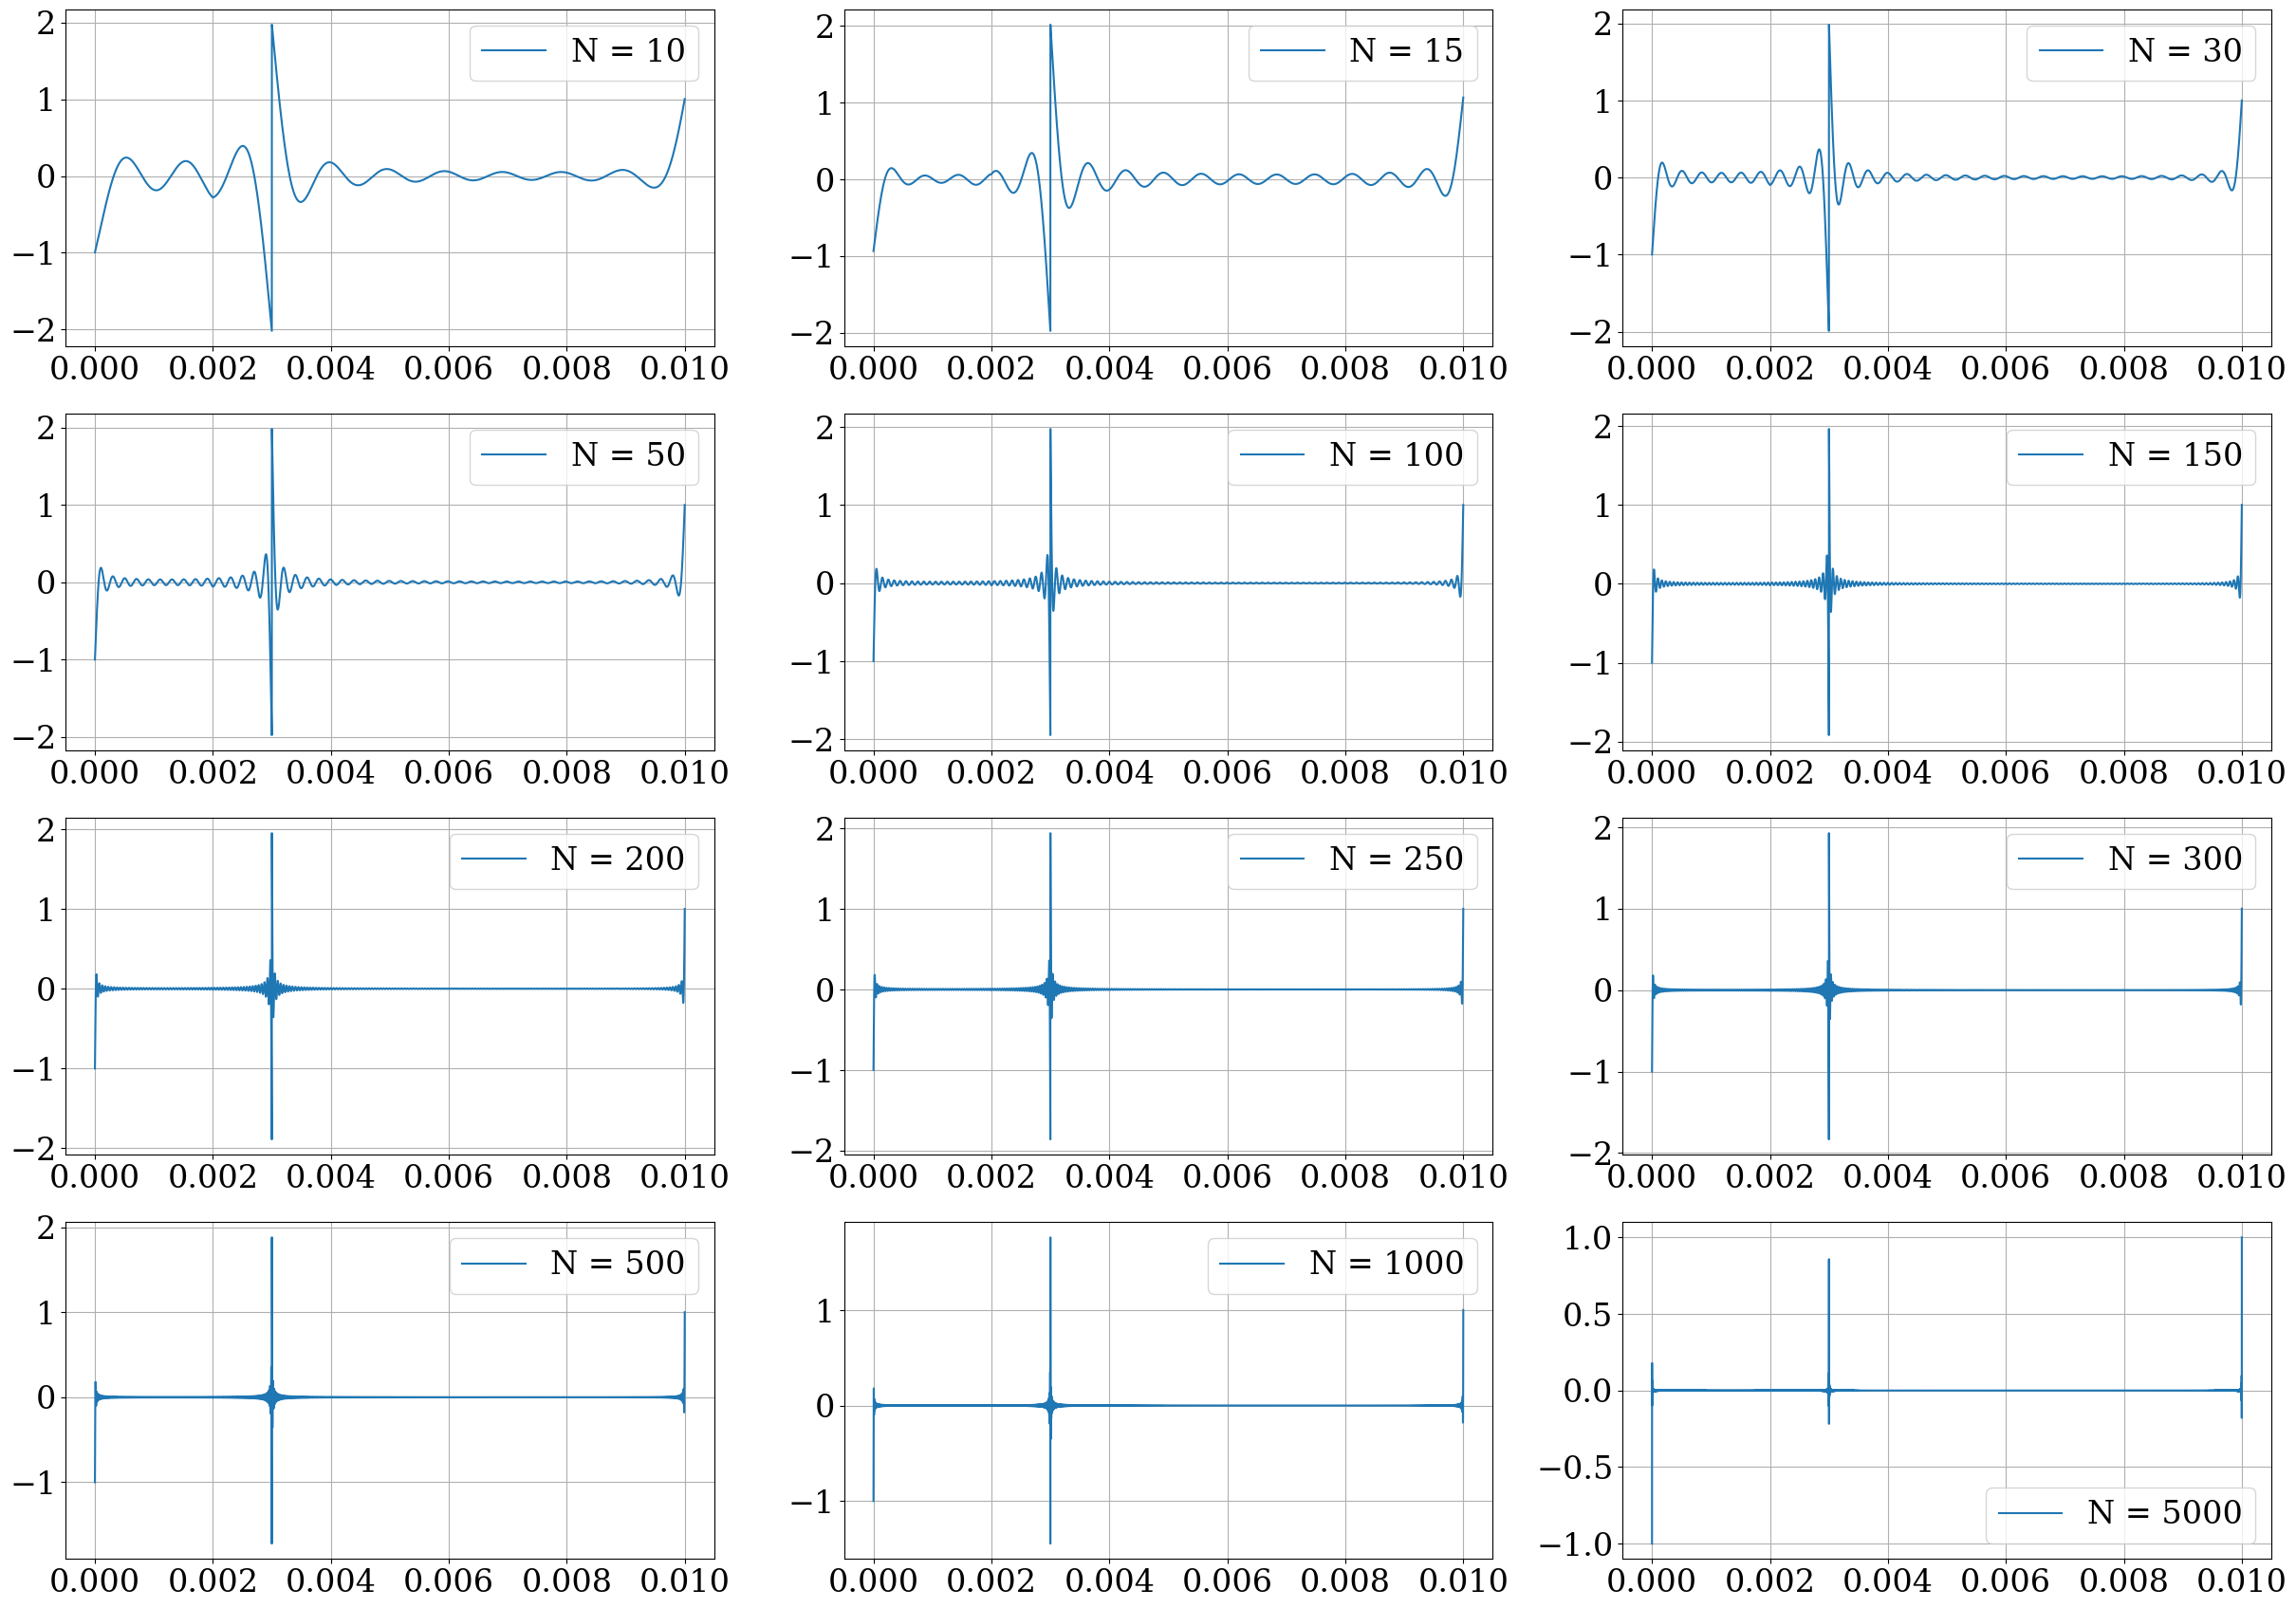

In [15]:
x = np.linspace(0, T, 10000)
for i, M in enumerate([10, 15, 30] + list(range(50, 350, 50)) + [500, 1000, 5000], start=1):
    plt.subplot(4, 3, i)
    plt.plot(x, f(x, M)-f_orig(x))
    plt.legend([f'N = {M}'])
    plt.grid()
plt.savefig("saar-err.png")